In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn import metrics

#### Creating artificial data

A problem with machine learning, especially when you are starting out and want to learn about the algorithms, is that it is often difficult to get suitable test data. 

In [2]:
large_chi = np.genfromtxt("../../data/Large_chi.dat")
large_chi = np.delete(large_chi, 0, 0)
large_chi_df = pd.DataFrame(large_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
large_chi_df.head()

,ustat,alph1,alph2,beta,chi
0,10.510266,2.344511,2.344511,60.0,3.280779
1,15.747414,1.459300,1.459300,60.0,15.873000
2,9.215366,1.499488,1.499488,89.3,10.877743
3,7.372293,1.499488,1.499488,89.3,3.841368
4,12.984962,2.438502,2.076896,46.7,5.734794


0.25     8.713569
0.50    10.344806
0.75    11.976379
Name: ustat, dtype: float64
sd: 2.4691874203368824
mean: 10.326957973668554
median: 10.344806346811
min: 5.265923675845
max: 15.747413833915


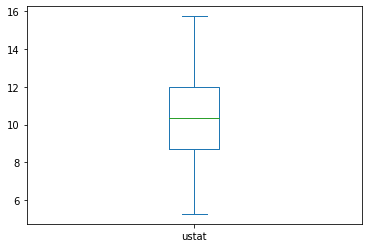

In [3]:
large_chi_df['ustat'].plot.box()
print(large_chi_df['ustat'].quantile([0.25,0.5,0.75]))

print("sd:", large_chi_df['ustat'].std())
print("mean:", large_chi_df['ustat'].mean())

print("median:", large_chi_df['ustat'].median())
print("min:", large_chi_df['ustat'].min())
print("max:", large_chi_df['ustat'].max())

0.25    1.535035
0.50    2.132171
0.75    2.462107
Name: alph1, dtype: float64
sd: 0.6228725855287206
mean: 2.151878837804343
median: 2.1321711161455
min: 1.45930048352
max: 3.509591530055


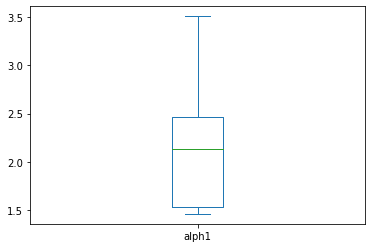

In [4]:
large_chi_df['alph1'].plot.box()
print(large_chi_df['alph1'].quantile([0.25,0.5,0.75]))

print("sd:", large_chi_df['alph1'].std())
print("mean:", large_chi_df['alph1'].mean())

print("median:", large_chi_df['alph1'].median())
print("min:", large_chi_df['alph1'].min())
print("max:", large_chi_df['alph1'].max())

0.25    1.535035
0.50    1.991636
0.75    2.307606
Name: alph2, dtype: float64
sd: 0.8531037070409859
mean: 2.1400917752497373
median: 1.991635583934
min: 1.45930048352
max: 6.236981666667


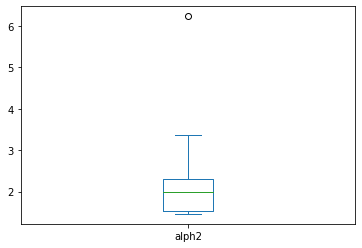

In [5]:
large_chi_df['alph2'].plot.box()
print(large_chi_df['alph2'].quantile([0.25,0.5,0.75]))

print("sd:", large_chi_df['alph2'].std())
print("mean:", large_chi_df['alph2'].mean())

print("median:", large_chi_df['alph2'].median())
print("min:", large_chi_df['alph2'].min())
print("max:", large_chi_df['alph2'].max())

0.25    46.70
0.50    51.45
0.75    60.00
Name: beta, dtype: float64
sd: 19.448148957324637
mean: 53.363157894736844
median: 51.45
min: 13.6
max: 89.3


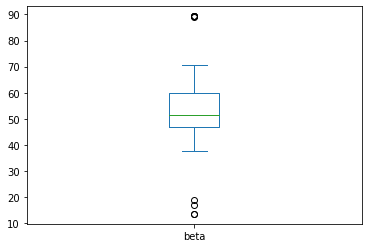

In [6]:
large_chi_df['beta'].plot.box()
print(large_chi_df['beta'].quantile([0.25,0.5,0.75]))

print("sd:", large_chi_df['beta'].std())
print("mean:", large_chi_df['beta'].mean())

print("median:", large_chi_df['beta'].median())
print("min:", large_chi_df['beta'].min())
print("max:", large_chi_df['beta'].max())

0.25    3.626894
0.50    5.285976
0.75    9.890551
Name: chi, dtype: float64
sd: 5.552484395322056
mean: 7.425552397280289
median: 5.285976470324
min: 3.055007364405
max: 25.005331620136


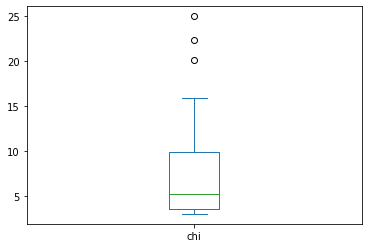

In [7]:
large_chi_df['chi'].plot.box()
print(large_chi_df['chi'].quantile([0.25,0.5,0.75]))

print("sd:", large_chi_df['chi'].std())
print("mean:", large_chi_df['chi'].mean())

print("median:", large_chi_df['chi'].median())
print("min:", large_chi_df['chi'].min())
print("max:", large_chi_df['chi'].max())

In [8]:
import numpy as np
import pandas as pd

cities = list(range(0, 100))


n= len(cities)

# normal(mu, sigma)
data = {'ustat': np.random.normal(large_chi_df['ustat'].mean(), large_chi_df['ustat'].std(), n),
        'alph1': np.random.normal(large_chi_df['alph1'].mean(), large_chi_df['alph1'].std(), n),
        'alph2': np.random.normal(large_chi_df['alph2'].mean(), large_chi_df['alph2'].std(), n),
        'beta': np.random.normal(large_chi_df['beta'].mean(), large_chi_df['beta'].std(), n),
        'chi': np.random.normal(large_chi_df['chi'].mean(), large_chi_df['chi'].std(), n)
       }
df = pd.DataFrame(data=data, index=cities)
df

,ustat,alph1,alph2,beta,chi
0,12.292430,2.607531,3.935316,53.886312,5.524314
1,11.501091,1.919021,3.745269,96.103948,7.837235
2,11.652619,2.344091,1.715227,37.165216,16.645666
3,10.870337,1.797608,0.743441,50.601188,10.966375
4,11.876640,2.108081,3.075950,54.453699,12.462129
...,...,...,...,...,...
95,5.463897,2.315339,3.056161,72.364078,1.351907
96,12.094200,2.028608,0.580601,59.226388,10.261413
97,6.979256,1.907995,3.270820,56.359235,2.934197
98,9.179781,2.890604,2.372385,12.062923,4.717556


In [9]:
df.to_csv("../../data/processed/week04_large_chi_art_data.csv", index = False)